In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [7]:
n = torch.tensor([1,0])
torch.tile(n,(100,1)).shape

torch.Size([100, 2])

In [103]:
Q=100
x, w = np.polynomial.legendre.leggauss(int(Q/5))
gauss_pts = np.array(np.meshgrid(x,x,indexing='ij')).reshape(2,-1).T/2 + 0.5
weights = (w*w[:,None]).ravel()
x_Q = []
w = []
for i in range(5):
    for j in range(5):
        newpts = 0.2*gauss_pts
        newpts[:,0] = newpts[:,0] + 0.2*i
        newpts[:,1] = newpts[:,1] + 0.2*j
        x_Q.append(newpts)
        w.append(weights)
w = np.array(w).flatten()
x_Q = torch.tensor(x_Q)
x_Q = x_Q.reshape(x_Q.shape[0]*x_Q.shape[1],x_Q.shape[2])

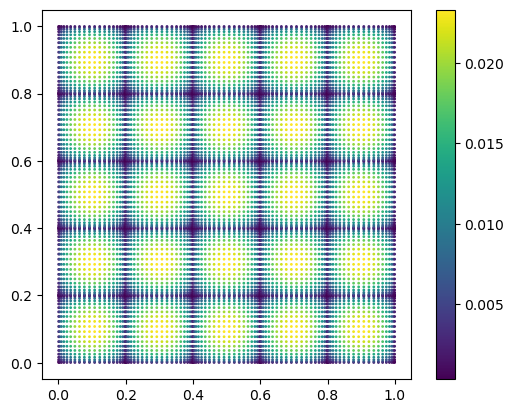

In [104]:
plt.scatter(x_Q[:,0], x_Q[:,1], s=1, c=w)
plt.axis('square')
plt.colorbar()

In [106]:
x_Gamma, w_Gamma = np.polynomial.legendre.leggauss(int(Q/5))
w_Gamma = np.stack((w_Gamma,w_Gamma,w_Gamma,w_Gamma,w_Gamma)).flatten()
w_Gamma = np.stack((w_Gamma,w_Gamma,w_Gamma,w_Gamma)).flatten()

In [107]:
gauss_pts = x_Gamma/2 + 0.5
x_Q_Gamma = []
weights = []
for i in range(5):
    x_Q_Gamma.append(0.2*gauss_pts + 0.2*i)
x_Q_Gamma = np.array(x_Q_Gamma)
x_Q_Gamma = x_Q_Gamma.flatten()

In [108]:
x_Q_Gamma.shape

(100,)

In [109]:
w.shape

(10000,)

In [110]:
Gamma_l = np.zeros((Q,2))
Gamma_l[:,1] = x_Q_Gamma
Gamma_r = np.ones((Q,2))
Gamma_r[:,1] = x_Q_Gamma
Gamma_b = np.zeros((Q,2))
Gamma_b[:,0] = x_Q_Gamma
Gamma_t = np.ones((Q,2))
Gamma_t[:,0] = x_Q_Gamma

Gamma = np.zeros((4,Q,2))
Gamma[0] = Gamma_l
Gamma[1] = Gamma_r
Gamma[2] = Gamma_b
Gamma[3] = Gamma_t

Gamma = Gamma.reshape(Gamma.shape[0]*Gamma.shape[1],Gamma.shape[2])

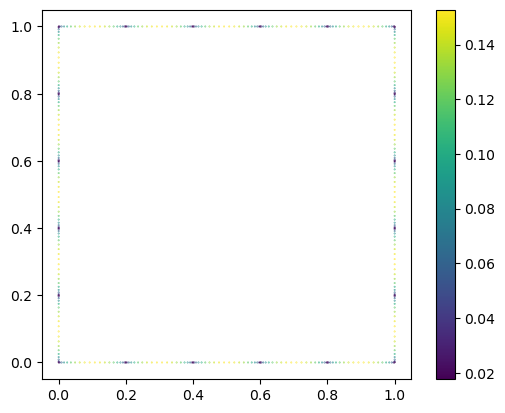

In [113]:
plt.scatter(Gamma[:,0], Gamma[:,1], c=w_Gamma, s=0.1)
plt.axis('square')
plt.colorbar()

In [90]:
Gamma.shape

(400, 2)

In [91]:
weights.shape

(2000,)